In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 텍스트 전처리

In [2]:
df = pd.read_csv("./fintech_news.csv")
df

,뉴스제목,원문링크,본문
0,"FIU, 은행·증권·보험 등 전 금융사와 초국경 범죄 거래 유형 분석한다",https://n.news.naver.com/mnews/article/277/000...,"이형주 '자금세탁방지 유관기관협의회' 개최앞으로 금융정보분석원(FIU)은 은행, 저..."
1,"금감원, 금융보안원 가입 GA에 운영실태평가 가점…'보안 역량' 끌어올린다",https://n.news.naver.com/mnews/article/030/000...,이미지=게티이미지뱅크금융감독원이 금융보안원에 가입한 보험대리점(GA)에 대해 내부통...
2,"회계법인 감사보수 ‘뚝' 떨어지자…금감원 ""보수 경쟁보다 품질 우선""",https://n.news.naver.com/mnews/article/648/000...,감사 부문 전년대비 증가폭 둔화·비감사 부문은 확대회계법인이 외부감사를 통해 받는 ...
3,"금감원장, 키움증권 찾아 '모범사례' 당부…발행어음 투자 주의점은",https://n.news.naver.com/mnews/article/119/000...,"정부 정책 따라 발행어음 사업자 증가경쟁 심화되면 '부실' 우려 커질 수도""리스크 ..."
4,"토스뱅크, 금융권 첫 '신분증 진위확인 소프트웨어' 부수업무 신고",https://n.news.naver.com/mnews/article/629/000...,인공지능(AI) 기반 신분증 진위확인 기술 제공토스뱅크가 금융권 최초로 '신분증 진...
...,...,...,...
9238,"인도네시아, 브릭스 가입…""중국에 한 발 더 가까워져""",https://n.news.naver.com/mnews/article/001/001...,수출시장 확대·달러 의존도 낮추는 데 도움…反서방집단 합류 해석 우려중국 인도네시아...
9239,"[CES 2025] 젠슨 황, 로봇 개발 플랫폼 공개…""로봇의 챗GPT 모멘트 온다...",https://n.news.naver.com/mnews/article/001/001...,젠슨 황 8년만에 기조연설…로봇·자율주행 등 물리적 AI 개발 '코스모스' 공개日 ...
9240,"""연준, 확고한 동결 신호 보내""…올해 금리 인하 1회 가능성",https://n.news.naver.com/mnews/article/123/000...,◆…미 연방준비제도(Fed)가 당분간 금리를 동결하고 올해 금리 인하를 단 한번 단...
9241,“인수 포기 못 해” vs “지금 못 팔아”…US스틸 매각 놓고 美·日 갈등 확산,https://n.news.naver.com/mnews/article/081/000...,"일본제철, 바이든 불허 불복 소송하시모토 회장 “美에 항전할 것”트럼프 “관세로 더..."


In [3]:
df.columns

Index(['뉴스제목', '원문링크', '본문'], dtype='object')

In [4]:
df = df[['뉴스제목', '본문']].copy()
df

,뉴스제목,본문
0,"FIU, 은행·증권·보험 등 전 금융사와 초국경 범죄 거래 유형 분석한다","이형주 '자금세탁방지 유관기관협의회' 개최앞으로 금융정보분석원(FIU)은 은행, 저..."
1,"금감원, 금융보안원 가입 GA에 운영실태평가 가점…'보안 역량' 끌어올린다",이미지=게티이미지뱅크금융감독원이 금융보안원에 가입한 보험대리점(GA)에 대해 내부통...
2,"회계법인 감사보수 ‘뚝' 떨어지자…금감원 ""보수 경쟁보다 품질 우선""",감사 부문 전년대비 증가폭 둔화·비감사 부문은 확대회계법인이 외부감사를 통해 받는 ...
3,"금감원장, 키움증권 찾아 '모범사례' 당부…발행어음 투자 주의점은","정부 정책 따라 발행어음 사업자 증가경쟁 심화되면 '부실' 우려 커질 수도""리스크 ..."
4,"토스뱅크, 금융권 첫 '신분증 진위확인 소프트웨어' 부수업무 신고",인공지능(AI) 기반 신분증 진위확인 기술 제공토스뱅크가 금융권 최초로 '신분증 진...
...,...,...
9238,"인도네시아, 브릭스 가입…""중국에 한 발 더 가까워져""",수출시장 확대·달러 의존도 낮추는 데 도움…反서방집단 합류 해석 우려중국 인도네시아...
9239,"[CES 2025] 젠슨 황, 로봇 개발 플랫폼 공개…""로봇의 챗GPT 모멘트 온다...",젠슨 황 8년만에 기조연설…로봇·자율주행 등 물리적 AI 개발 '코스모스' 공개日 ...
9240,"""연준, 확고한 동결 신호 보내""…올해 금리 인하 1회 가능성",◆…미 연방준비제도(Fed)가 당분간 금리를 동결하고 올해 금리 인하를 단 한번 단...
9241,“인수 포기 못 해” vs “지금 못 팔아”…US스틸 매각 놓고 美·日 갈등 확산,"일본제철, 바이든 불허 불복 소송하시모토 회장 “美에 항전할 것”트럼프 “관세로 더..."


In [5]:
!pip install konlpy

In [6]:
import re
from konlpy.tag import Mecab
mecab = Mecab()

In [7]:
def text_clean(x):
    # 한글, 영문대소문자, 숫자만 남기고 모두 제거
    cleaned = re.sub(r'[^가-힣a-zA-Z0-9]', " ", x)
    cleaned = cleaned.replace("  ", " ").replace("  ", " ").strip()
    return cleaned

In [8]:
def tokenizer(text):
    tokens = mecab.morphs(text)
    return tokens

In [9]:
df.dropna()

,뉴스제목,본문
0,"FIU, 은행·증권·보험 등 전 금융사와 초국경 범죄 거래 유형 분석한다","이형주 '자금세탁방지 유관기관협의회' 개최앞으로 금융정보분석원(FIU)은 은행, 저..."
1,"금감원, 금융보안원 가입 GA에 운영실태평가 가점…'보안 역량' 끌어올린다",이미지=게티이미지뱅크금융감독원이 금융보안원에 가입한 보험대리점(GA)에 대해 내부통...
2,"회계법인 감사보수 ‘뚝' 떨어지자…금감원 ""보수 경쟁보다 품질 우선""",감사 부문 전년대비 증가폭 둔화·비감사 부문은 확대회계법인이 외부감사를 통해 받는 ...
3,"금감원장, 키움증권 찾아 '모범사례' 당부…발행어음 투자 주의점은","정부 정책 따라 발행어음 사업자 증가경쟁 심화되면 '부실' 우려 커질 수도""리스크 ..."
4,"토스뱅크, 금융권 첫 '신분증 진위확인 소프트웨어' 부수업무 신고",인공지능(AI) 기반 신분증 진위확인 기술 제공토스뱅크가 금융권 최초로 '신분증 진...
...,...,...
9238,"인도네시아, 브릭스 가입…""중국에 한 발 더 가까워져""",수출시장 확대·달러 의존도 낮추는 데 도움…反서방집단 합류 해석 우려중국 인도네시아...
9239,"[CES 2025] 젠슨 황, 로봇 개발 플랫폼 공개…""로봇의 챗GPT 모멘트 온다...",젠슨 황 8년만에 기조연설…로봇·자율주행 등 물리적 AI 개발 '코스모스' 공개日 ...
9240,"""연준, 확고한 동결 신호 보내""…올해 금리 인하 1회 가능성",◆…미 연방준비제도(Fed)가 당분간 금리를 동결하고 올해 금리 인하를 단 한번 단...
9241,“인수 포기 못 해” vs “지금 못 팔아”…US스틸 매각 놓고 美·日 갈등 확산,"일본제철, 바이든 불허 불복 소송하시모토 회장 “美에 항전할 것”트럼프 “관세로 더..."


In [10]:
df.loc[:, '뉴스제목'] = df['뉴스제목'].apply(text_clean)
df.loc[:, '본문'] = df['본문'].apply(text_clean)

In [11]:
df

,뉴스제목,본문
0,FIU 은행 증권 보험 등 전 금융사와 초국경 범죄 거래 유형 분석한다,이형주 자금세탁방지 유관기관협의회 개최앞으로 금융정보분석원 FIU 은 은행 저축은행...
1,금감원 금융보안원 가입 GA에 운영실태평가 가점 보안 역량 끌어올린다,이미지 게티이미지뱅크금융감독원이 금융보안원에 가입한 보험대리점 GA 에 대해 내부통...
2,회계법인 감사보수 뚝 떨어지자 금감원 보수 경쟁보다 품질 우선,감사 부문 전년대비 증가폭 둔화 비감사 부문은 확대회계법인이 외부감사를 통해 받는 ...
3,금감원장 키움증권 찾아 모범사례 당부 발행어음 투자 주의점은,정부 정책 따라 발행어음 사업자 증가경쟁 심화되면 부실 우려 커질 수도 리스크 관리...
4,토스뱅크 금융권 첫 신분증 진위확인 소프트웨어 부수업무 신고,인공지능 AI 기반 신분증 진위확인 기술 제공토스뱅크가 금융권 최초로 신분증 진위확...
...,...,...
9238,인도네시아 브릭스 가입 중국에 한 발 더 가까워져,수출시장 확대 달러 의존도 낮추는 데 도움 서방집단 합류 해석 우려중국 인도네시아 ...
9239,CES 2025 젠슨 황 로봇 개발 플랫폼 공개 로봇의 챗GPT 모멘트 온다 종합,젠슨 황 8년만에 기조연설 로봇 자율주행 등 물리적 AI 개발 코스모스 공개 도요타...
9240,연준 확고한 동결 신호 보내 올해 금리 인하 1회 가능성,미 연방준비제도 Fed 가 당분간 금리를 동결하고 올해 금리 인하를 단 한번 단행할...
9241,인수 포기 못 해 vs 지금 못 팔아 US스틸 매각 놓고 갈등 확산,일본제철 바이든 불허 불복 소송하시모토 회장 에 항전할 것 트럼프 관세로 더 수익 ...


# wordcloud화

In [12]:
!pip install wordcloud

In [13]:
from wordcloud import WordCloud

In [14]:
text_data = df['뉴스제목'].astype(str).tolist()
text_data = df['본문'].astype(str).tolist()
full_text = " ".join(text_data)

In [15]:
df

,뉴스제목,본문
0,FIU 은행 증권 보험 등 전 금융사와 초국경 범죄 거래 유형 분석한다,이형주 자금세탁방지 유관기관협의회 개최앞으로 금융정보분석원 FIU 은 은행 저축은행...
1,금감원 금융보안원 가입 GA에 운영실태평가 가점 보안 역량 끌어올린다,이미지 게티이미지뱅크금융감독원이 금융보안원에 가입한 보험대리점 GA 에 대해 내부통...
2,회계법인 감사보수 뚝 떨어지자 금감원 보수 경쟁보다 품질 우선,감사 부문 전년대비 증가폭 둔화 비감사 부문은 확대회계법인이 외부감사를 통해 받는 ...
3,금감원장 키움증권 찾아 모범사례 당부 발행어음 투자 주의점은,정부 정책 따라 발행어음 사업자 증가경쟁 심화되면 부실 우려 커질 수도 리스크 관리...
4,토스뱅크 금융권 첫 신분증 진위확인 소프트웨어 부수업무 신고,인공지능 AI 기반 신분증 진위확인 기술 제공토스뱅크가 금융권 최초로 신분증 진위확...
...,...,...
9238,인도네시아 브릭스 가입 중국에 한 발 더 가까워져,수출시장 확대 달러 의존도 낮추는 데 도움 서방집단 합류 해석 우려중국 인도네시아 ...
9239,CES 2025 젠슨 황 로봇 개발 플랫폼 공개 로봇의 챗GPT 모멘트 온다 종합,젠슨 황 8년만에 기조연설 로봇 자율주행 등 물리적 AI 개발 코스모스 공개 도요타...
9240,연준 확고한 동결 신호 보내 올해 금리 인하 1회 가능성,미 연방준비제도 Fed 가 당분간 금리를 동결하고 올해 금리 인하를 단 한번 단행할...
9241,인수 포기 못 해 vs 지금 못 팔아 US스틸 매각 놓고 갈등 확산,일본제철 바이든 불허 불복 소송하시모토 회장 에 항전할 것 트럼프 관세로 더 수익 ...


In [16]:
print(type(full_text))
print(full_text[:200])

<class 'str'>
이형주 자금세탁방지 유관기관협의회 개최앞으로 금융정보분석원 FIU 은 은행 저축은행 증권 보험 등 전 금융권과 협력해 초국경 범죄 의심거래 유형을 분석하기로 했다 금융회사들이 의심거래를 보고하면 FIU가 의심거래를 분석하면 법 집행기관에서 범죄조직 적발에 활용할 계획이다 FIU는 금감원 16개 유관기관 등과 함께 초국경 범죄 관련 자금세탁방지 AML 유관기


In [17]:
text_data = df[['뉴스제목', '본문']].fillna('').astype(str)
full_text = (text_data['뉴스제목'] + " " + text_data['본문']).str.cat(sep=" ")

In [18]:
df['뉴스제목'] = df.get('뉴스제목', pd.Series(['']*len(df))).fillna('').astype(str)
df['본문'] = df.get('본문', pd.Series(['']*len(df))).fillna('').astype(str)

# 3. 두 컬럼 합치기
df['full_text'] = df['뉴스제목'] + ' ' + df['본문']

# 4. Mecab 명사 추출
from konlpy.tag import Mecab
mecab = Mecab()
df['nouns'] = df['full_text'].apply(lambda x: [w for w in mecab.nouns(x) if len(w) > 1])

# 5. 불용어 제거
stopwords = set([
    '한국핀테크지원센터', '한국핀테크산업협회', '핀테크', '채용관', '핀테크기업', '기업', '은행',
    '사람인', 'saramin', '모집', '상반기', '참여', '한국', '뱅크', '과정', '업계',
    '기준', '분기', '프로그램', '개최', '지원', '금융', '센터', '2025', '2025년',
    '금융당국', '공고','카카오','토스','기관','관련','혁신','당국','시장'])
df['nouns'] = df['nouns'].apply(lambda x: [w for w in x if w not in stopwords])

all_nouns = []
for tokens in df['nouns']:
    all_nouns.extend(tokens)
filtered = all_nouns

# 확인
print(df[['full_text','nouns']].head())

                                           full_text  \
0  FIU 은행 증권 보험 등 전 금융사와 초국경 범죄 거래 유형 분석한다 이형주 자금...   
1  금감원 금융보안원 가입 GA에 운영실태평가 가점 보안 역량 끌어올린다 이미지 게티이...   
2  회계법인 감사보수 뚝 떨어지자 금감원 보수 경쟁보다 품질 우선 감사 부문 전년대비 ...   
3  금감원장 키움증권 찾아 모범사례 당부 발행어음 투자 주의점은 정부 정책 따라 발행어...   
4  토스뱅크 금융권 첫 신분증 진위확인 소프트웨어 부수업무 신고 인공지능 AI 기반 신...   

                                               nouns  
0  [증권, 보험, 국경, 범죄, 거래, 유형, 분석, 이형주, 자금, 세탁, 방지, ...  
1  [금감원, 보안원, 가입, 운영, 실태, 평가, 보안, 역량, 이미지, 게티, 이미...  
2  [회계, 법인, 감사, 보수, 금감원, 보수, 경쟁, 품질, 감사, 부문, 전년, ...  
3  [금감원, 키움증권, 모범, 사례, 당부, 발행, 어음, 투자, 정부, 정책, 발행...  
4  [신분증, 진위, 확인, 소프트웨어, 부수, 업무, 신고, 인공지능, 기반, 신분증...  


In [19]:
from collections import Counter
word_freq = Counter(filtered)
word_freq

Counter({'대출': 24879,
         '금리': 19084,
         '보험': 18981,
         '투자': 17145,
         '자산': 15440,
         '서비스': 14221,
         '미국': 14135,
         '코인': 12045,
         '상품': 11618,
         '카드': 11243,
         '가능': 10732,
         '스테이': 10398,
         '결제': 10240,
         '지난해': 9109,
         '달러': 9039,
         '고객': 8795,
         '규제': 8753,
         '거래': 8623,
         '확대': 8360,
         '중국': 8099,
         '관리': 7763,
         '디지털': 7743,
         '국내': 7659,
         '수익': 7641,
         '올해': 7503,
         '제공': 7472,
         '증가': 7453,
         '기술': 7291,
         '증권': 7229,
         '신용': 7223,
         '자금': 7136,
         '정부': 7131,
         '규모': 7104,
         '정책': 7029,
         '필요': 6998,
         '경우': 6974,
         '제도': 6871,
         '우리': 6774,
         '최근': 6716,
         '강화': 6692,
         '이상': 6607,
         '자본': 6554,
         '하나': 6425,
         '대비': 6218,
         '경제': 6197,
         '저축': 6150,
         '페이': 61

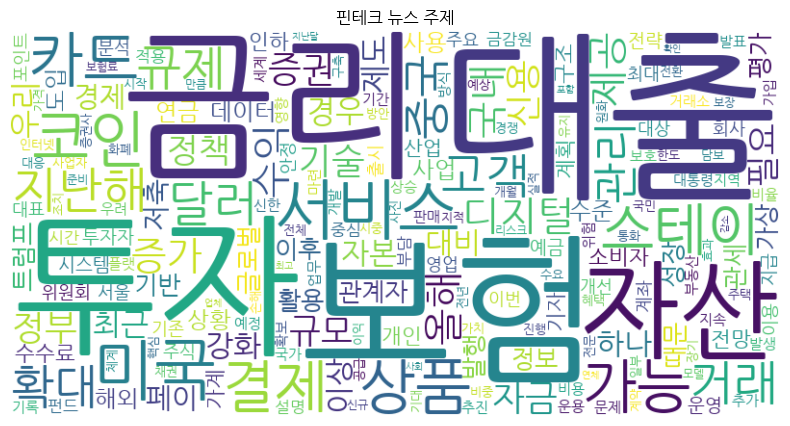

In [20]:
wc = WordCloud(
        font_path='NanumGothic.ttf',
        background_color='white',
        width=800,
        height=400).generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("핀테크 뉴스 주제")
plt.show()

# LDA 모델링

In [21]:
!pip install gensim 

In [22]:
from gensim.models import CoherenceModel
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
# mecab 으로 명사만 추출해서 길이가 2 이상인 것만 모아서 리스트로 만드는 함수
def tokenize_texts(text_data):
    return [[word for word in mecab.nouns(doc) if len(word) > 1] for doc in text_data]

In [24]:
result = []
for doc in text_data:
    for word in mecab.nouns(doc):
        if len(word) > 1:
            result.append(word)

In [25]:
def find_optimal_topics(text_data, start=2, end=8):
    # text_data는 문자열 리스트
    tokenized_texts = tokenize_texts(text_data)
    if not tokenized_texts:
        return start
    # gensim으로 BoW(숫자로 인코딩 된 단어 모음)
    dictionary = corpora.Dictionary(tokenized_texts)
    vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
    
    try:
        doc_term_matrix = vectorizer.fit_transform(tokenized_texts)
    except:
        print("벡터화중 오류발생, 기본 토픽 수 2개 반환")
        return start
    
    best_score = -1
    best_n = start
    
    # LDA 분석
    for n_topics in range(start, end+1):
        lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda_model.fit(doc_term_matrix)
        
        feature_names = vectorizer.get_feature_names_out()
        # 상위 10개의 단어를 순서대로 추출
        topics = [[feature_names[i] for i in topic.argsort()[:-11:-1]] for topic in lda_model.components_]
        
        # 응집도 계산
        cm = CoherenceModel(topics=topics, texts=tokenized_texts, dictionary=dictionary, coherence="c_v")
        score = cm.get_coherence()
        print(f"토픽수: {n_topics}, Coherence Score: {score:.4f}")
        
        if score > best_score:
            best_score = score
            best_n = n_topics
    
    print(f"최적 토픽수: {best_n} (Score: {best_score:.4f})")
    return best_n

In [26]:
import pandas as pd
from konlpy.tag import Mecab
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

In [27]:
# --- 1. 불용어 정의 ---
stopwords = set([
    '한국핀테크지원센터', '한국핀테크산업협회', '핀테크', '채용관', '핀테크기업', '기업', '은행',
    '사람인', 'saramin', '모집', '상반기', '참여', '한국', '뱅크', '과정', '업계',
    '기준', '분기', '프로그램', '개최', '지원', '금융', '센터', '2025', '2025년',
    '금융당국', '공고','카카오','토스','기관','관련','혁신','당국','시장'
])

# --- 2. full_text 만들기 ---
df['뉴스제목'] = df.get('뉴스제목', pd.Series(['']*len(df))).fillna('').astype(str)
df['본문'] = df.get('본문', pd.Series(['']*len(df))).fillna('').astype(str)
df['full_text'] = df['뉴스제목'] + ' ' + df['본문']

# --- 3. Mecab 토큰화 ---
mecab = Mecab()
def tokenize_texts(texts):
    tokenized = []
    for doc in texts:
        if not isinstance(doc, str):
            continue
        nouns = [w for w in mecab.nouns(doc) if len(w) > 1 and w not in stopwords]
        tokenized.append(nouns)
    return tokenized

texts = df['full_text'].tolist()
tokenized_texts = tokenize_texts(texts)

# --- 4. 최적 토픽 수 찾기 ---
def find_optimal_topics(tokenized_texts, start=2, end=5):
    if not tokenized_texts:
        return start

    dictionary = Dictionary(tokenized_texts)
    vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
    try:
        doc_term_matrix = vectorizer.fit_transform(tokenized_texts)
    except:
        return start

    best_score = -1
    best_n = start
    for n_topics in range(start, end+1):
        lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda_model.fit(doc_term_matrix)

        feature_names = vectorizer.get_feature_names_out()
        topics = [[feature_names[i] for i in topic.argsort()[:-11:-1]] for topic in lda_model.components_]

        cm = CoherenceModel(topics=topics, texts=tokenized_texts, dictionary=dictionary, coherence="c_v")
        score = cm.get_coherence()
        if score > best_score:
            best_score = score
            best_n = n_topics

    return best_n

best_k = find_optimal_topics(tokenized_texts, start=2, end=5)

# --- 5. LDA 모델링 ---
vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words=list(stopwords))
review_vec = vectorizer.fit_transform([' '.join(doc) for doc in tokenized_texts])

if review_vec.shape[1] == 0:
    print("분석할 단어가 부족합니다.")
else:
    lda = LatentDirichletAllocation(n_components=best_k, learning_method='online', random_state=42)
    lda.fit(review_vec)

    words = vectorizer.get_feature_names_out()
    print(f"\n뉴스 기사 {len(texts)}건 / 토픽 {best_k}개 - 상위 단어")
    print("=" * 100)
    for i, topic in enumerate(lda.components_):
        top = [words[idx] for idx in topic.argsort()[-10:]]
        print(f"토픽 #{i}: {top}")

/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



뉴스 기사 9243건 / 토픽 5개 - 상위 단어
토픽 #0: ['투자', '대통령', '산업', '데이터', '경제', '관세', '기술', '트럼프', '중국', '미국']
토픽 #1: ['이용', '신용', '대출', '상품', '제공', '페이', '결제', '고객', '카드', '서비스']
토픽 #2: ['펀드', '거래', '투자자', '자산', '제도', '금감원', '연금', '자본', '증권', '투자']
토픽 #3: ['화폐', '발행', '결제', '거래', '디지털', '달러', '가상', '스테이', '자산', '코인']
토픽 #4: ['대비', '상품', '가계', '인하', '지난해', '저축', '증가', '보험', '금리', '대출']
